# Importing Necessary Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [89]:
data=pd.read_csv("C:\\Users\\vishn\\Downloads\\heart+failure+clinical+records\\heart_failure_clinical_records_dataset.csv")

# checking the few records in the dataset

In [90]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Explanatory Data Analysis (EDA)

## Information about dataframe

In [91]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


## Out of all 299 records no null values and no categorical  values are found

## Checking for missing values

In [92]:
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Descriptive Statistics

In [93]:
print(data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

## Outliers Detection

age has 0 outliers
anaemia has 0 outliers
creatinine_phosphokinase has 29 outliers
diabetes has 0 outliers
ejection_fraction has 2 outliers
high_blood_pressure has 0 outliers
platelets has 21 outliers
serum_creatinine has 29 outliers
serum_sodium has 4 outliers
sex has 0 outliers
smoking has 0 outliers
time has 0 outliers
DEATH_EVENT has 0 outliers


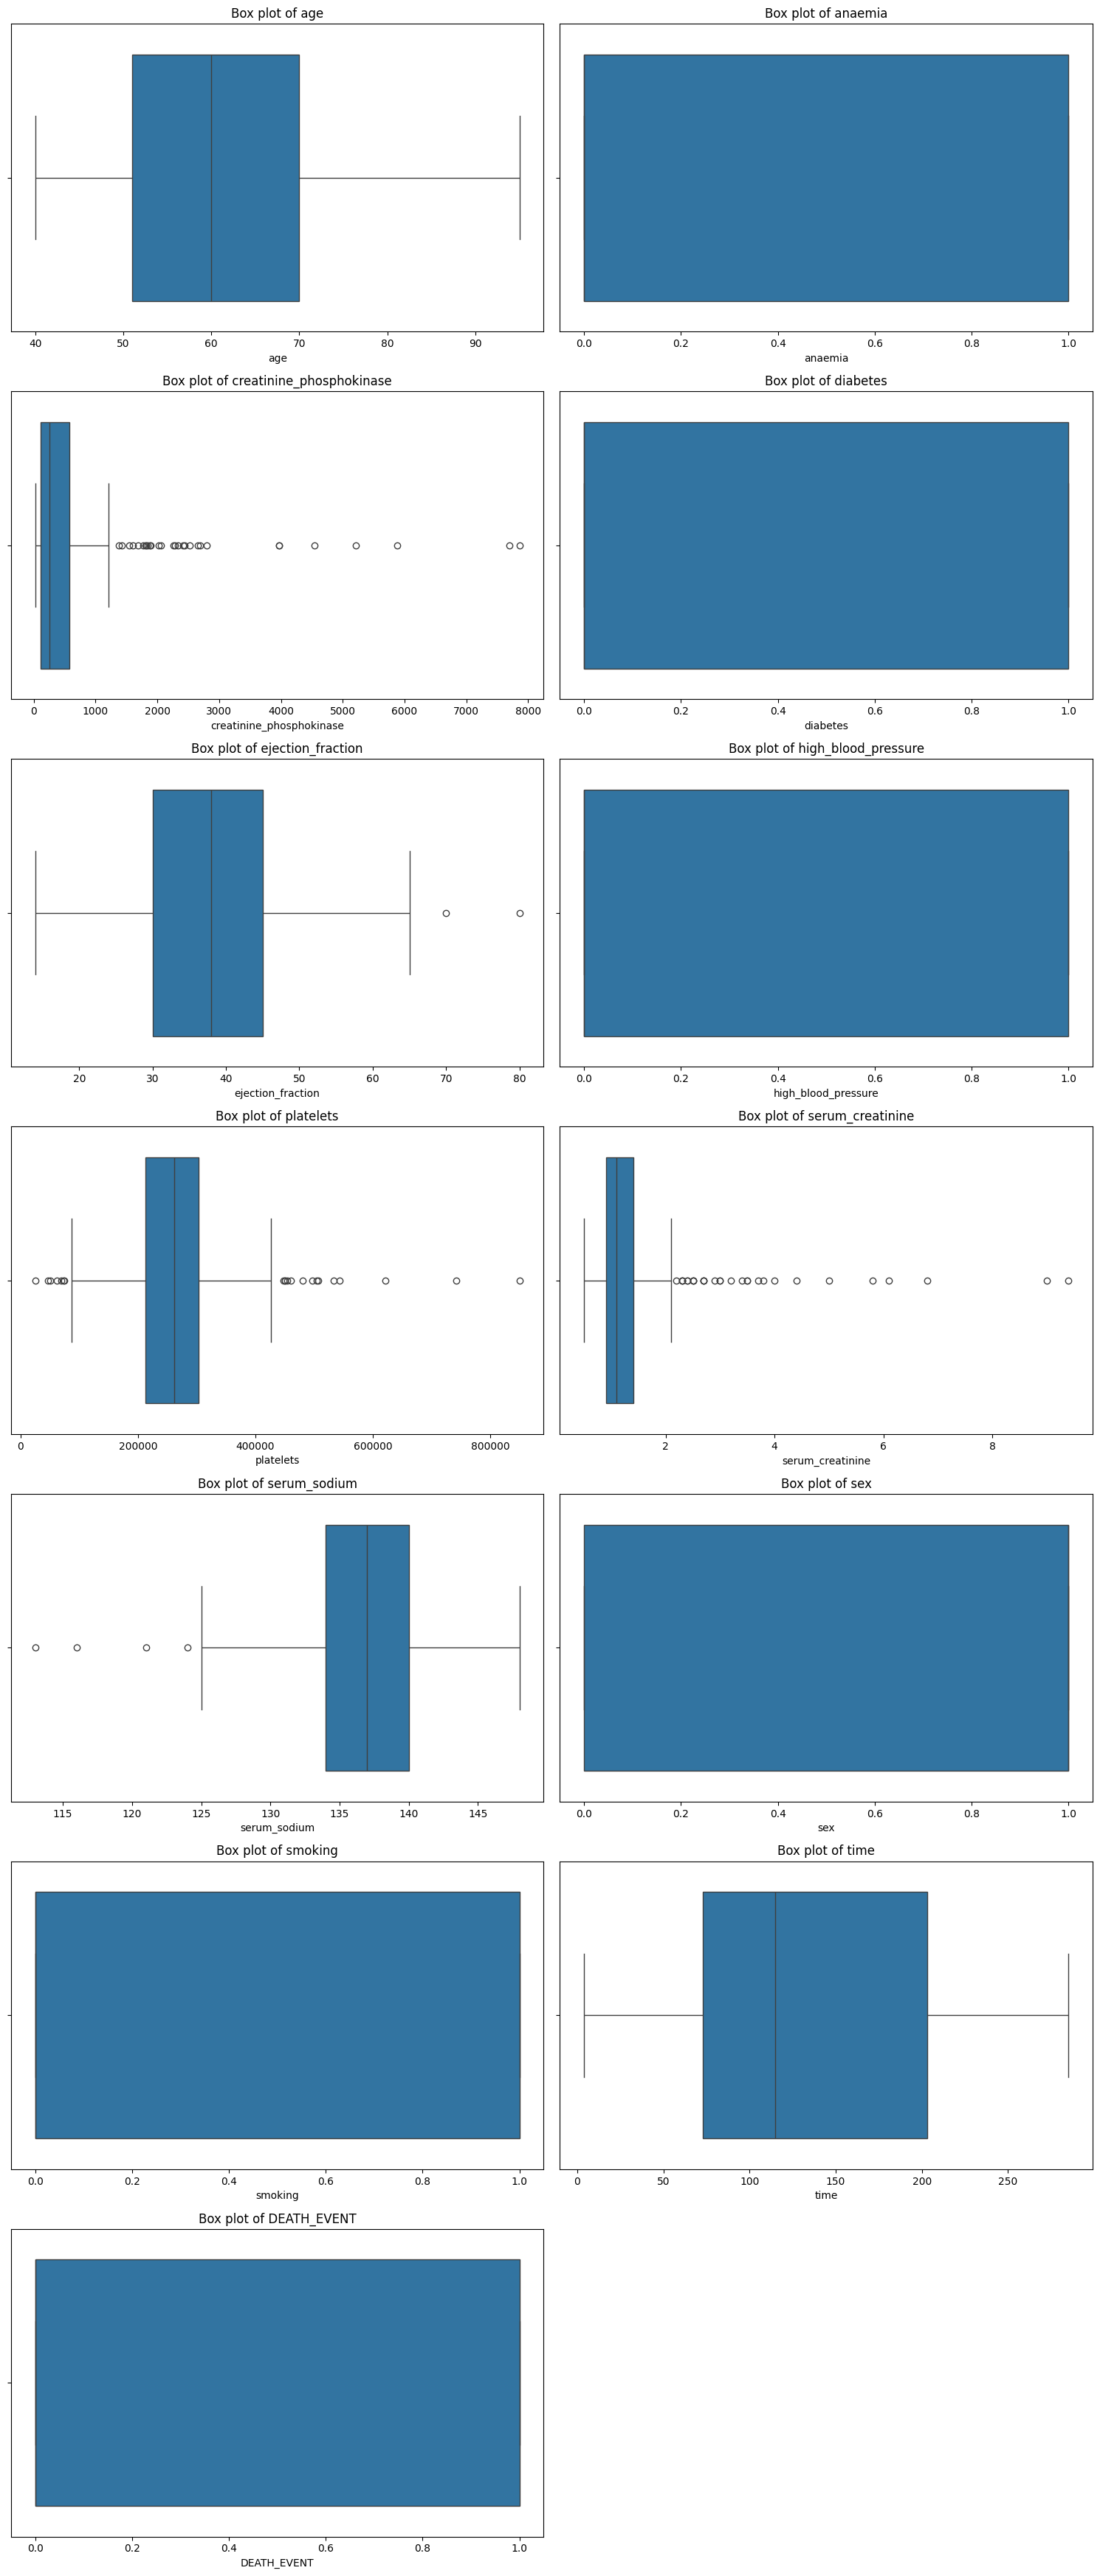

In [175]:
def detect_outliers_iqr(df):
    outliers_dict = {}
    
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outliers_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outliers_dict[column] = outliers_list_col
        
    return outliers_dict

outliers_dict = detect_outliers_iqr(data)

for column, indices in outliers_dict.items():
    print(f"{column} has {len(indices)} outliers")

num_plots = len(data.select_dtypes(include=np.number).columns)
num_rows = num_plots // 2 + num_plots % 2  # This will ensure that we have enough rows for all columns

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.ravel()  # Flatten the axes array to 1D

for i, column in enumerate(data.select_dtypes(include=np.number).columns):
    sns.boxplot(x=data[column], ax=axes[i])  
    axes[i].set_title(f'Box plot of {column}')  

# If the number of plots is odd, we deactivate the last axis
if num_plots % 2 != 0:
    axes[-1].axis('off')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


## Removing outliers

In [176]:
unique_outliers = set().union(*outliers_dict.values())
print(f"Total outliers detected: {len(unique_outliers)}")

data_clean = data.drop(index=unique_outliers)

print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_clean.shape)

Total outliers detected: 75
Original data shape: (299, 13)
Data shape after removing outliers: (224, 13)


## Correlation Matrix

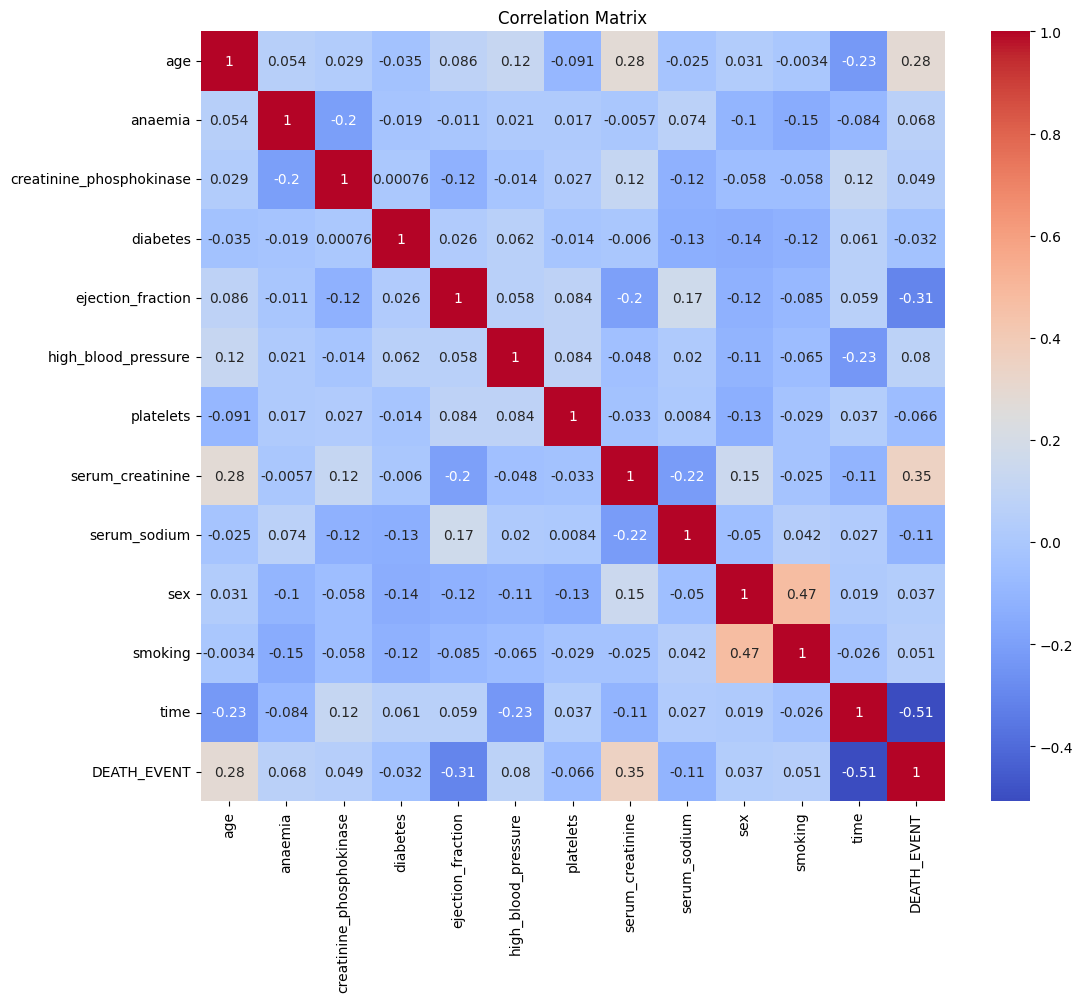

In [177]:
# Correlation matrix
corr = data_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Serum Creatinine and Age are moderately positively correlated with heart failure deaths, suggesting they are important risk indicators.
Ejection Fraction and Follow-up Time have moderate to strong negative correlations with death events, implying that better heart function and longer follow-up are associated with lower mortality risk.
Sex and Smoking show negligible correlations with mortality, indicating these may not be strong predictors in this dataset.
Platelets, Diabetes, Blood Pressure, and Anaemia have weak correlations with mortality, suggesting their individual predictive power might be limited.

## Distribution of target Variable

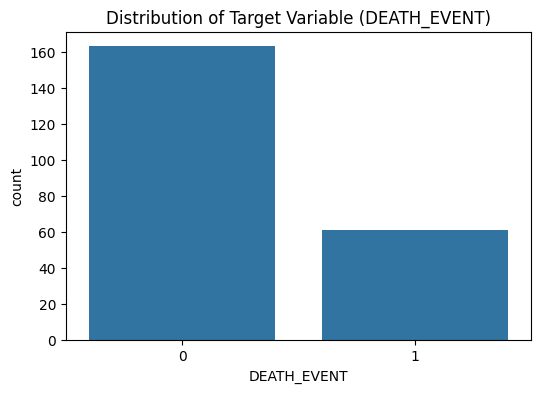

In [178]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=data_clean)
plt.title('Distribution of Target Variable (DEATH_EVENT)')
plt.show()

## Distribution of each feature except target

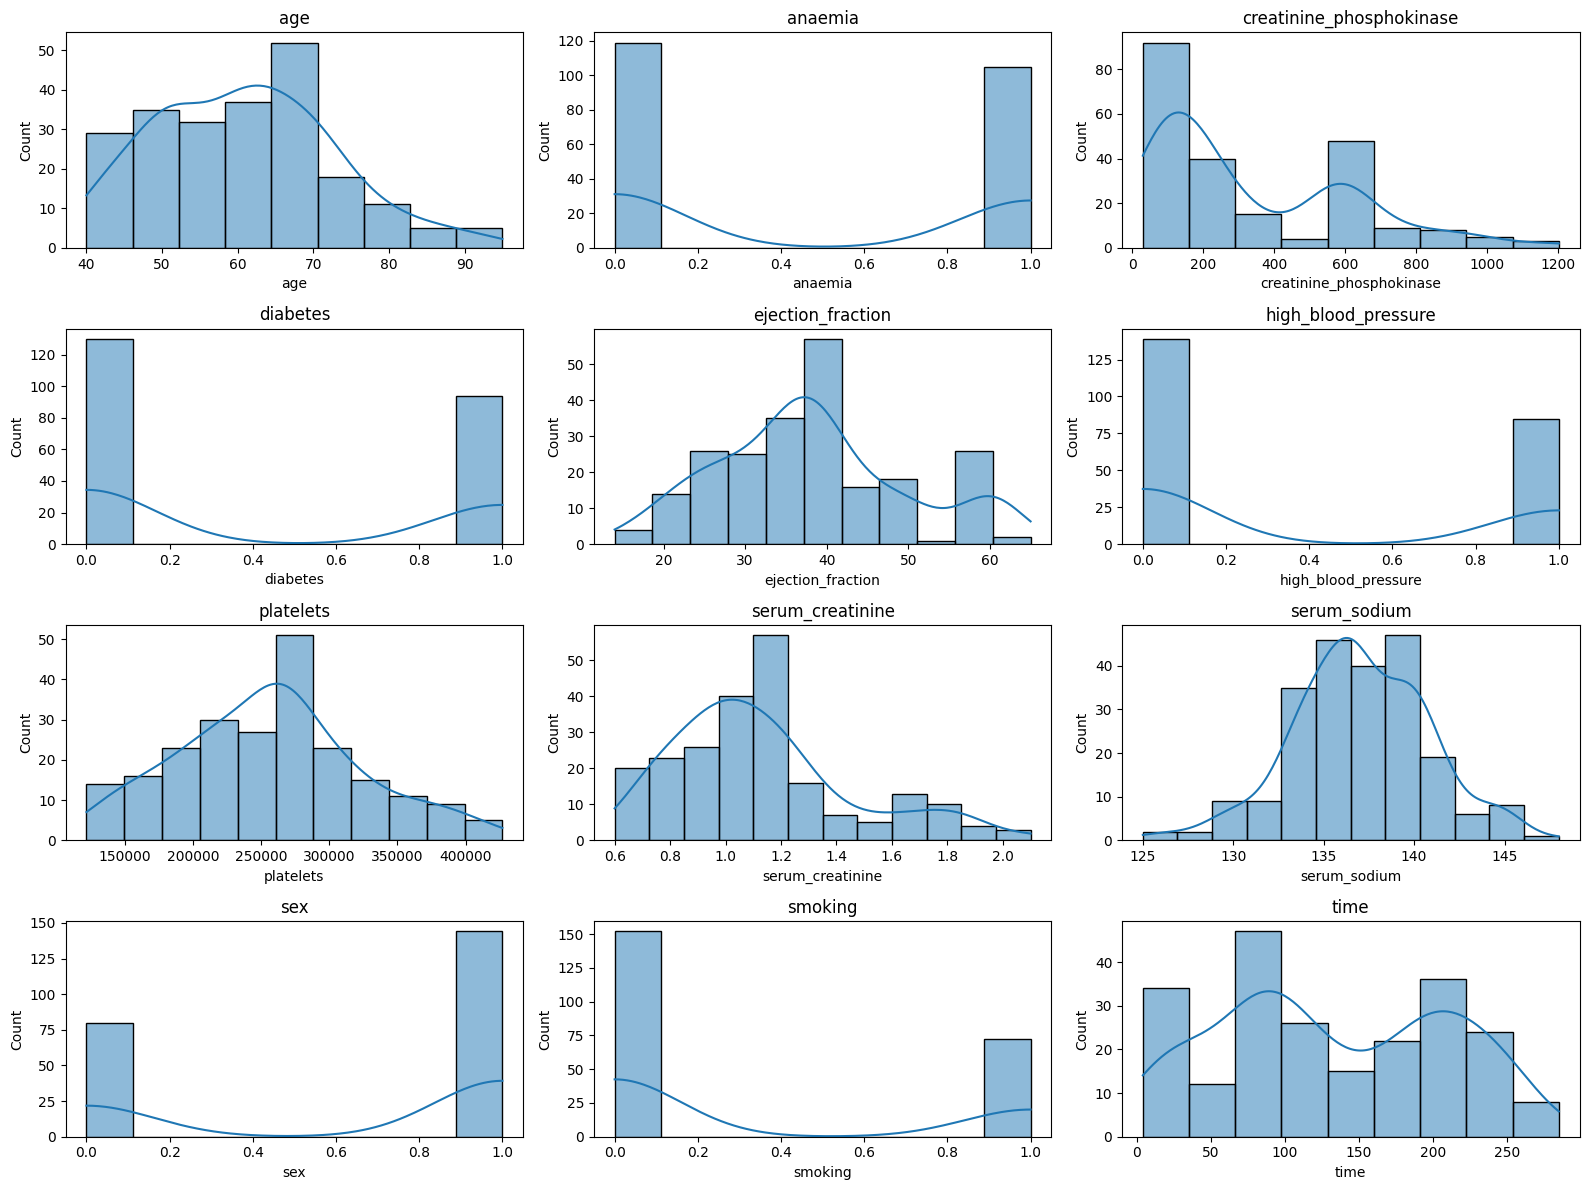

In [179]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('DEATH_EVENT')

num_features = len(numerical_features)
rows = (num_features + 2) // 3  

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data_clean[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


## Target Vs Each Feature

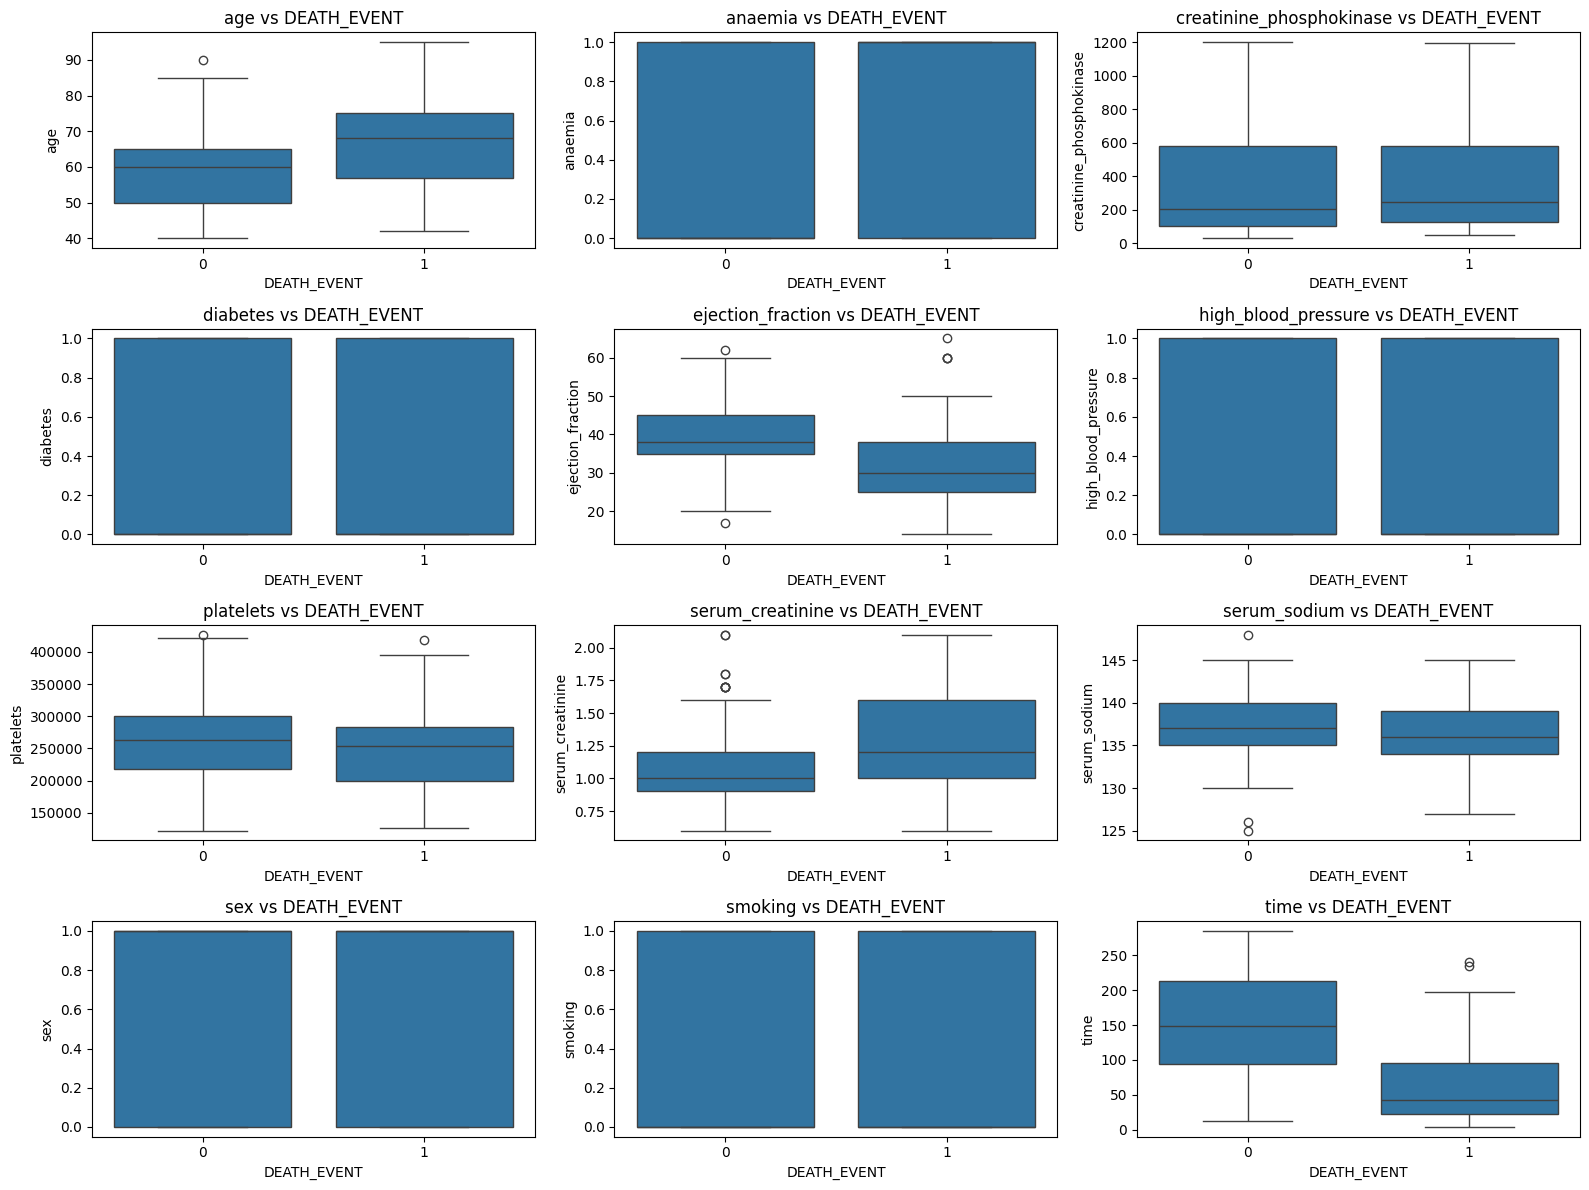

In [180]:
# Relationship between numerical features and target variable
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=data_clean)
    plt.title(f'{feature} vs DEATH_EVENT')
plt.tight_layout()
plt.show()

# Machine Learning Modeling 

## Importing necessary libraries

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


## Splitting the data for both training and testing

In [182]:
X = data_clean.drop('DEATH_EVENT', axis=1)
y = data_clean['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}


## Standardizing Data with StandardScaler

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [194]:
print(X_train_scaled.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       179 non-null    float64
 1   anaemia                   179 non-null    float64
 2   creatinine_phosphokinase  179 non-null    float64
 3   diabetes                  179 non-null    float64
 4   ejection_fraction         179 non-null    float64
 5   high_blood_pressure       179 non-null    float64
 6   platelets                 179 non-null    float64
 7   serum_creatinine          179 non-null    float64
 8   serum_sodium              179 non-null    float64
 9   sex                       179 non-null    float64
 10  smoking                   179 non-null    float64
 11  time                      179 non-null    float64
dtypes: float64(12)
memory usage: 16.9 KB
None


In [195]:
X_train_scaled.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

I standardize the data after scaling because it prevents any date leakage. Scaling before splitting can lead to data leakage where information from the entire dataset is used to transform the data. This means that the scale transformation will incorporate knowledge from the test set into the scaling parameters, which should ideally be unseen during the training phase. This can result in overly optimistic performance estimates during model evaluation.

In [196]:
np.any(np.isinf(X_train_scaled))

False

## Train and evaluating the models

In [184]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
    print(f'{name} Accuracy: {accuracy:.3f}, AUC-ROC: {auc_roc:.3f}')


Logistic Regression Accuracy: 0.800, AUC-ROC: 0.840
Decision Tree Accuracy: 0.733, AUC-ROC: 0.639
Random Forest Accuracy: 0.800, AUC-ROC: 0.893
XGBoost Accuracy: 0.844, AUC-ROC: 0.858


# Hyper-parameter tuning

In [185]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200]}
}

results = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {
        'accuracy': accuracy,
        'auc_roc': auc_roc,
        'best_params': grid_search.best_params_,
        'best_model': best_model
    }

for name, result in results.items():
    print(f"{name} - Accuracy: {result['accuracy']:.3f}, AUC-ROC: {result['auc_roc']:.3f}, Best Params: {result['best_params']}")

Logistic Regression - Accuracy: 0.800, AUC-ROC: 0.845, Best Params: {'C': 0.1}
Decision Tree - Accuracy: 0.800, AUC-ROC: 0.690, Best Params: {'max_depth': 3}
Random Forest - Accuracy: 0.822, AUC-ROC: 0.902, Best Params: {'n_estimators': 200}
XGBoost - Accuracy: 0.822, AUC-ROC: 0.917, Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


# checking the sklearn version
As Eli5 is not compatible with updated version of both sklearn and python. So I downgrade both versions (sklearn 0.24.2 & Python 3.8.19). I take these versions compatibility from documentations of both from official websites.

In [186]:
import sklearn
print(sklearn.__version__)

0.24.2


## checking python version

In [187]:
import sys
print(sys.version) 

3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]


## checking Eli5 version

In [188]:
import eli5
print(eli5.__version__)

0.13.0


# Importing lime and shape

In [189]:
from eli5.sklearn import PermutationImportance
import lime
import shap

Error in above needs to update pip and ipywidgets that would effect on eli5 and scikit-learn libraries, whose are not compatible to higher versions.

# Interpretability of Logistic Regression

In [211]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

eli5.show_weights(lr, top=None, feature_names=X_train_scaled.columns.tolist())



Weight?,Feature
+0.568,serum_creatinine
+0.436,age
+0.301,smoking
+0.262,anaemia
+0.180,creatinine_phosphokinase
+0.059,platelets
+0.024,diabetes
-0.140,high_blood_pressure
-0.278,serum_sodium
-0.451,sex


## Explaining Model Predictions with Eli5
Taking one positive and negative row from test data and analyze the contributions of different features for both.

In [213]:
rd_row_positive = X_test[y_test == 1].iloc[0]
rd_row_negative = X_test[y_test == 0].iloc[0]

eli5.show_prediction(lr, rd_row_positive, top=None, feature_names=X_train_scaled.columns.tolist())

eli5.show_prediction(lr, rd_row_negative, top=None, feature_names=X_train_scaled.columns.tolist())


# Feature Importance in Decision Tree Model Using ELI5

In [227]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
perm = PermutationImportance(dt, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.0444 ± 0.0281,serum_creatinine
0.0356 ± 0.0603,time
0.0178 ± 0.0435,diabetes
0.0044 ± 0.0178,age
0 ± 0.0000,sex
0 ± 0.0000,serum_sodium
0 ± 0.0000,high_blood_pressure
0 ± 0.0000,anaemia
-0.0044 ± 0.0518,ejection_fraction
-0.0089 ± 0.0218,smoking


## Explaining Individual Predictions with Decision Tree Model

In [152]:
rd_row_positive = X_test[y_test == 1].iloc[0]
rd_row_negative = X_test[y_test == 0].iloc[0]
eli5.show_prediction(dt, rd_row_positive, top=None, feature_names=X_train_scaled_df.columns.tolist())
eli5.show_prediction(dt, rd_row_negative, top=None, feature_names=X_train_scaled_df.columns.tolist())

# Interpreting Random Forest and XGBoost Models with LIME


In [228]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_df, y_train)
xgb = XGBClassifier()
xgb.fit(X_train_scaled_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Setting Up LIME for Model Interpretation

In [133]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X_train_scaled_df.columns.tolist(), class_names=['Not Death', 'Death'], categorical_features=[], categorical_names={}, kernel_width=3
)


## Interpreting Random Forest Predictions with LIME

In [229]:
rd_row_positive = X_test[y_test == 1].iloc[0]
rd_row_negative = X_test[y_test == 0].iloc[0]
explanation_positive = lime_explainer.explain_instance(rd_row_positive, rf.predict_proba, num_features=len(X_train_scaled_df.columns))
explanation_negative = lime_explainer.explain_instance(rd_row_negative, rf.predict_proba, num_features=len(X_train_scaled_df.columns))

print('Random Forest - Positive Prediction:')
print(f'Coefficients: {explanation_positive.local_exp}')
print(f'Intercept: {explanation_positive.intercept}')
print(f'R^2: {explanation_positive.score}')
print()

print('Random Forest - Negative Prediction:')
print(f'Coefficients: {explanation_negative.local_exp}')
print(f'Intercept: {explanation_negative.intercept}')
print(f'R^2: {explanation_negative.score}')


Random Forest - Positive Prediction:
Coefficients: {1: [(7, 0.026539446144747233), (5, -0.022656572415808297), (1, 0.013818500111623807), (3, -0.011385631174960987), (10, -0.0036267363362990166), (0, 0.00047302031032696074), (8, 0.0003963067362890216), (4, -0.0001694564973221777), (9, 0.00013915369589682905), (2, 9.986672833828181e-05), (6, 7.497787248605923e-05), (11, 2.6894831767240194e-05)]}
Intercept: {1: 0.3411157892557197}
R^2: 0.6390659475310525

Random Forest - Negative Prediction:
Coefficients: {1: [(5, 0.022340818428770583), (1, 0.014586832463306427), (3, -0.01005405305223619), (10, -0.004677473834101041), (7, -0.0032318348074307276), (4, 0.0011805440022827117), (11, -0.0005734181234607646), (2, -0.00035376136039125006), (0, -0.0003347609592495395), (8, -0.00013150408488794293), (6, -5.8392674018167125e-05), (9, -8.763962472552692e-07)]}
Intercept: {1: 0.3237089460388406}
R^2: 0.4056684627396241


## feature vs weights

In [230]:
for label, features in explanation_positive.local_exp.items():
    for feature_index, weight in features:
        feature_name = X_train_scaled_df.columns[feature_index]  
        print(f'Label {label}, Feature: {feature_name}, Weight: {weight}')

Label 1, Feature: serum_creatinine, Weight: 0.026539446144747233
Label 1, Feature: high_blood_pressure, Weight: -0.022656572415808297
Label 1, Feature: anaemia, Weight: 0.013818500111623807
Label 1, Feature: diabetes, Weight: -0.011385631174960987
Label 1, Feature: smoking, Weight: -0.0036267363362990166
Label 1, Feature: age, Weight: 0.00047302031032696074
Label 1, Feature: serum_sodium, Weight: 0.0003963067362890216
Label 1, Feature: ejection_fraction, Weight: -0.0001694564973221777
Label 1, Feature: sex, Weight: 0.00013915369589682905
Label 1, Feature: creatinine_phosphokinase, Weight: 9.986672833828181e-05
Label 1, Feature: platelets, Weight: 7.497787248605923e-05
Label 1, Feature: time, Weight: 2.6894831767240194e-05


## Visualizations

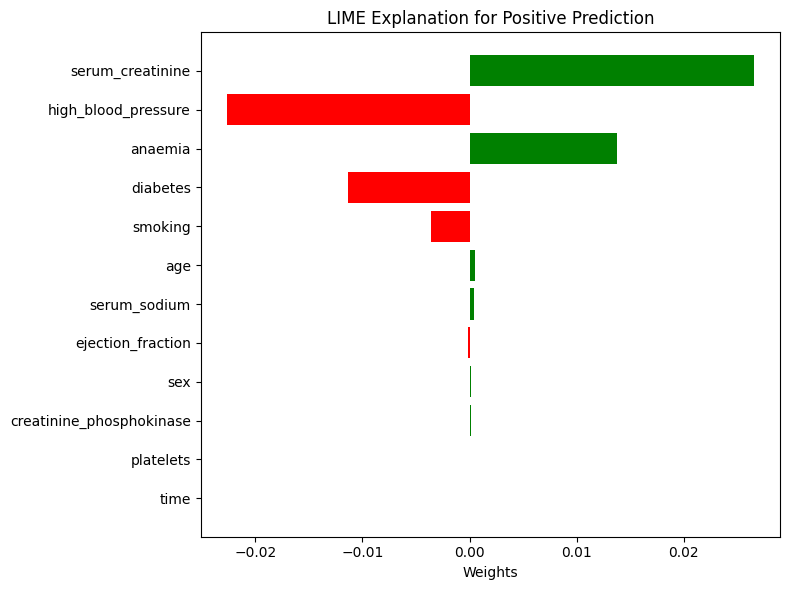

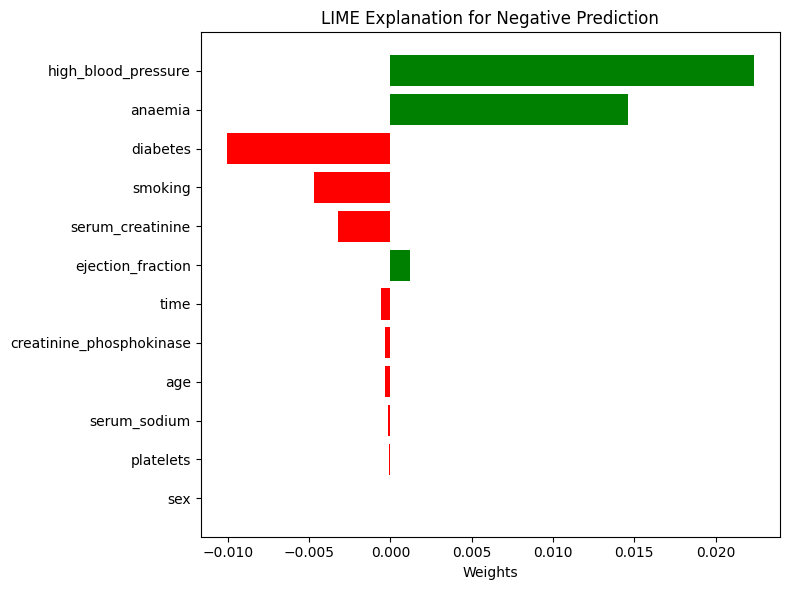

In [231]:
def plot_lime_explanation(explanation, title):
    label = 1  
    if label in explanation.local_exp:
        exp = dict(explanation.local_exp[label])
        feature_names = [X_train_scaled_df.columns[i] for i in exp.keys()]
        weights = list(exp.values())

        # Sorting the features by the absolute value of their weights
        features_weights = sorted(zip(feature_names, weights), key=lambda x: abs(x[1]), reverse=True)
        features, weights = zip(*features_weights)

        # Creating the plot
        fig, ax = plt.subplots(figsize=(8, 6))
        colors = ['green' if w > 0 else 'red' for w in weights]
        pos = range(len(features))
        ax.barh(pos, weights, color=colors, align='center')
        ax.set_yticks(pos)
        ax.set_yticklabels(features)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Weights')
        ax.set_title(title)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No explanation for label {label}. Check the available labels.")

plot_lime_explanation(explanation_positive, title='LIME Explanation for Positive Prediction')
plot_lime_explanation(explanation_negative, title='LIME Explanation for Negative Prediction')




## Interpreting XGBoost Predictions with LIME

In [232]:
rd_row_positive = X_test[y_test == 1].iloc[0]
rd_row_negative = X_test[y_test == 0].iloc[0]
explanation_positive = lime_explainer.explain_instance(rd_row_positive, xgb.predict_proba, num_features=len(X_train_scaled_df.columns))
explanation_negative = lime_explainer.explain_instance(rd_row_negative, xgb.predict_proba, num_features=len(X_train_scaled_df.columns))



## Analyzing LIME Explanations for XGBoost Model Predictions

In [233]:
print('XGBoost - Positive Prediction:')
print(f'Coefficients: {explanation_positive.local_exp}')
print(f'Intercept: {explanation_positive.intercept}')
print(f'R^2: {explanation_positive.score}')
print()

print('XGBoost - Negative Prediction:')
print(f'Coefficients: {explanation_negative.local_exp}')
print(f'Intercept: {explanation_negative.intercept}')
print(f'R^2: {explanation_negative.score}')


XGBoost - Positive Prediction:
Coefficients: {1: [(9, -0.057281462213776536), (7, 0.0029135265935638283), (3, -0.0011499742786780255), (11, 0.0006391349300443873), (2, 0.00046186335903965144), (4, 0.000369650252535478), (8, -0.00033722714795495954), (0, -0.00033011052403847006), (1, -0.0002903968524331369), (10, -0.00028335899834454554), (6, 0.0002380060686571294), (5, -4.081526906278839e-05)]}
Intercept: {1: 0.07830540432240582}
R^2: 0.7089323317728506

XGBoost - Negative Prediction:
Coefficients: {1: [(9, 0.05749035891517271), (7, 0.014084608423926205), (8, 0.0009433292832666548), (11, 0.0008814221155395007), (5, 0.0005640733087202083), (6, 0.0004339008012945577), (0, -0.00034083145548099677), (1, 0.0001831574453285472), (4, 0.0001228503708140905), (10, -0.00011301262759722738), (2, 3.547727276490719e-05), (3, -1.081329414666205e-05)]}
Intercept: {1: 0.015709436204919807}
R^2: 0.7509656758383921


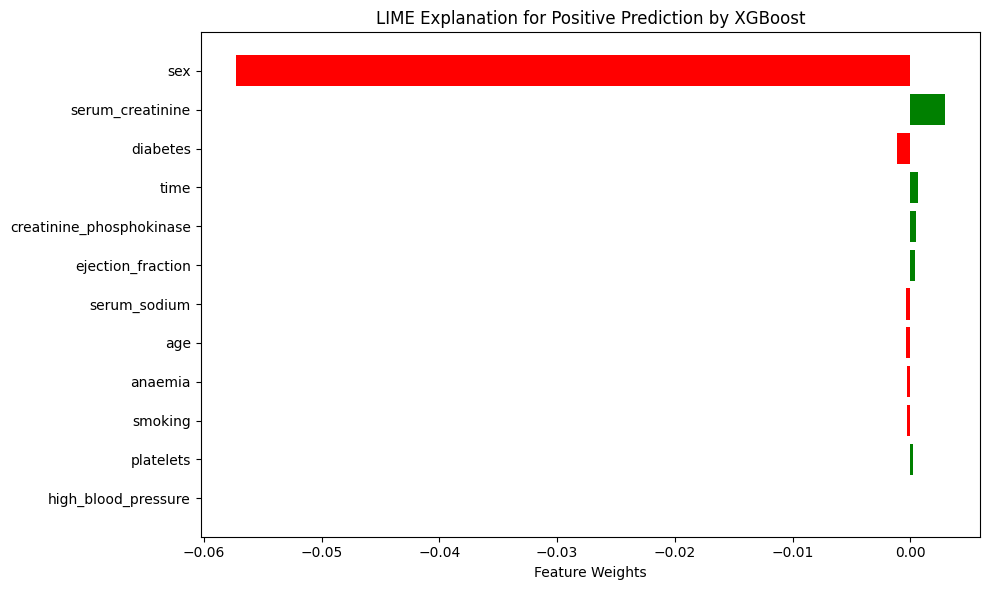

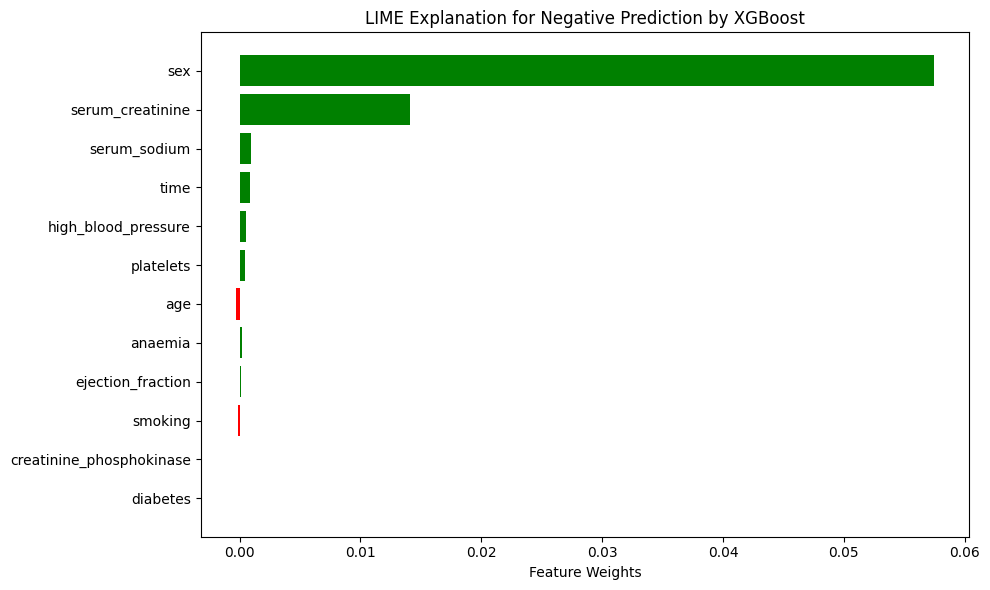

In [234]:
def plot_lime_features(features, weights, title):
    features_weights = sorted(zip(features, weights), key=lambda x: abs(x[1]), reverse=True)
    features, weights = zip(*features_weights)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['green' if weight > 0 else 'red' for weight in weights]
    ax.barh(features, weights, color=colors)
    ax.set_xlabel('Feature Weights')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the largest bars on top
    plt.tight_layout()
    plt.show()

features_pos = []
weights_pos = []

for label, feature_weights in explanation_positive.local_exp.items():
    for feature_index, weight in feature_weights:
        feature_name = X_train_scaled_df.columns[feature_index]
        features_pos.append(feature_name)
        weights_pos.append(weight)

features_neg = []
weights_neg = []

for label, feature_weights in explanation_negative.local_exp.items():
    for feature_index, weight in feature_weights:
        feature_name = X_train_scaled_df.columns[feature_index]
        features_neg.append(feature_name)
        weights_neg.append(weight)

plot_lime_features(features_pos, weights_pos, 'LIME Explanation for Positive Prediction by XGBoost')
plot_lime_features(features_neg, weights_neg, 'LIME Explanation for Negative Prediction by XGBoost')


## SHAP Analysis for XGBoost Model Predictions

In [235]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
expected_value = explainer.expected_value

vd_positive_indices = np.where(y_test == 1)[0]
vd_negative_indices = np.where(y_test == 0)[0]
ind_positive = vd_positive_indices[0] if vd_positive_indices.size > 0 else None
ind_negative = vd_negative_indices[0] if vd_negative_indices.size > 0 else None

print("Shape of shap_values:", shap_values.shape)


# Generate SHAP force plots for valid indices
if ind_positive is not None:
    explanation_pos = shap.Explanation(
        values=shap_values[ind_positive], 
        base_values=expected_value[0] if isinstance(expected_value, list) else expected_value,
        data=X_test.iloc[ind_positive].values,  
        feature_names=X_train_scaled_df.columns.tolist()
    )
    shap.force_plot(explanation_pos, link='logit', show=True)
else:
    print("No valid positive example found.")

if ind_negative is not None:
    explanation_neg = shap.Explanation(
        values=shap_values[ind_negative],  
        base_values=expected_value[0] if isinstance(expected_value, list) else expected_value,
        data=X_test.iloc[ind_negative].values,  
        feature_names=X_train_scaled_df.columns.tolist()
    )
    shap.force_plot(explanation_neg, link='logit', show=True)
else:
    print("No valid negative example found.")
    


Shape of shap_values: (45, 12)


## Feature Importance

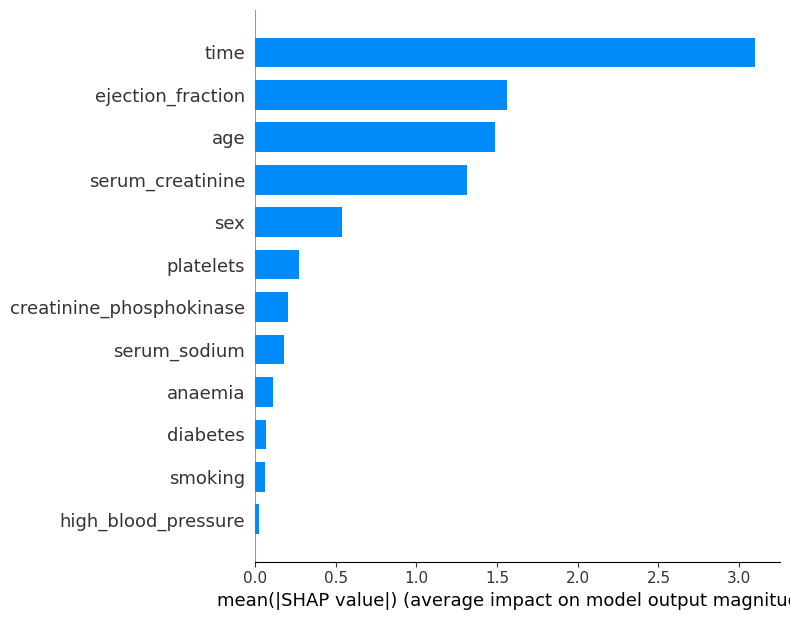

In [236]:
# Feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_train_scaled_df.columns.tolist())

# Predict Observations

In [237]:
rd_row_positive = X_test[y_test == 1].iloc[0]
rd_row_negative = X_test[y_test == 0].iloc[0]

# Define the label encoding
print("False/True label: 0/1")
print()

print('Positive Prediction:')
for name, result in results.items():
    best_model = result['best_model']
    row_array = rd_row_positive.values.reshape(1, -1)
    probs = best_model.predict_proba(row_array)[0]
    print(f"{name}: [{probs[1]:.3f} {probs[0]:.3f}]")

print('\nNegative Prediction:')
for name, result in results.items():
    best_model = result['best_model']
    row_array = rd_row_negative.values.reshape(1, -1)
    probs = best_model.predict_proba(row_array)[0]
    print(f"{name}: [{probs[1]:.3f} {probs[0]:.3f}]")


False/True label: 0/1

Positive Prediction:
Logistic Regression: [1.000 0.000]
Decision Tree: [0.035 0.965]
Random Forest: [0.315 0.685]
XGBoost: [0.289 0.711]

Negative Prediction:
Logistic Regression: [1.000 0.000]
Decision Tree: [0.035 0.965]
Random Forest: [0.330 0.670]
XGBoost: [0.258 0.742]


The Decision Tree model is consistently providing high probability predictions that align with the expected class labels for both the positive and negative cases